# Importing useful libraries for EDA 

All the libraries have been imported as pd,np,sns and plt

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns           
import matplotlib.pyplot as plt

# Importing data file and viewing first five entries

CSV( Comma Separated Values) file has been downloaded from Kaggle and imported here.

In [2]:
cars = pd.read_csv(r"D:\data.csv")
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Checking null values, statistical summary,shape and data types of the columns

To clean the data we check if there are any null values in the data and drop or fill that entry. Then we check the statistical summary, shape and data types of the data set.

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
cars.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
cars.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
print(cars.shape)

(11914, 16)


# Dropping Irrelevant Columns

Checking relevancy of columns through number of missing data in a column and based on its contribution to the target variable

In [8]:
cars.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**Dropping column named "Market Category" having 31.4% of data missing i.e. 3742 of 11914 entries. Also dropping column named "Engine Fuel Type" since it has no usefulness in the outcome of target variable i.e. MSRP**

In [9]:
cars=cars.drop(['Market Category','Engine Fuel Type'], axis=1)

In [10]:
cars.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Renaming Columns

In [11]:
cars.rename(columns={'Engine HP':'HP', 'Engine Cylinders':'Cylinders', 'Transmission Type':'Transmission', 'Driven_Wheels': 'Drive Mode','highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'}, inplace=True)

In [12]:
cars.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Checking for duplicated entries and null values and removing these values.

Duplicated and null entries can create inaccurate results so we find and remove these entries.

In [13]:
cars.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [14]:
cars.duplicated().sum()

791

In [15]:
cars = cars.drop_duplicates()
cars.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [16]:
cars=cars.dropna()

In [17]:
print(cars.isnull().sum())

Make               0
Model              0
Year               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Number of Doors    0
Vehicle Size       0
Vehicle Style      0
MPG-H              0
MPG-C              0
Popularity         0
Price              0
dtype: int64


# Plotting box plots of various columns to check for outliers

Outliers are values which are unexpected and need to be eliminated to get accuracy

{'whiskers': [<matplotlib.lines.Line2D at 0x28b26fcfac8>,
 'caps': [<matplotlib.lines.Line2D at 0x28b28f2de08>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b28839108>],
 'medians': [<matplotlib.lines.Line2D at 0x28b28f37fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b28f37b48>],
 'means': []}

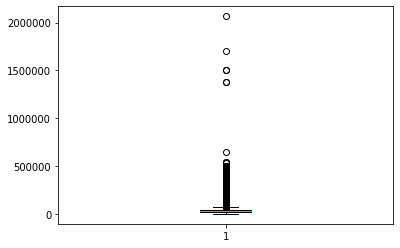

In [18]:
plt.boxplot(cars["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x28b28fa6408>,
 'caps': [<matplotlib.lines.Line2D at 0x28b28fcecc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b28fc5648>],
 'medians': [<matplotlib.lines.Line2D at 0x28b28fd4c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b28fd4d48>],
 'means': []}

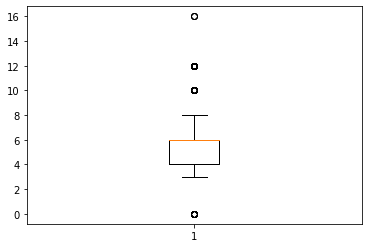

In [19]:
plt.boxplot(cars["Cylinders"])

{'whiskers': [<matplotlib.lines.Line2D at 0x28b29024cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x28b29046ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b2903e2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x28b2904a9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b2904af08>],
 'means': []}

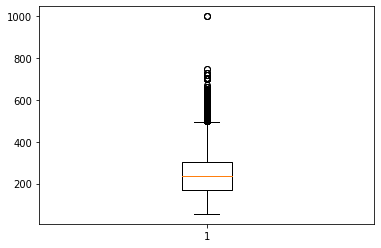

In [20]:
plt.boxplot(cars["HP"])

In [22]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.00
HP                   131.00
Cylinders              2.00
Number of Doors        2.00
MPG-H                  8.00
MPG-C                  6.00
Popularity          1460.00
Price              21426.25
dtype: float64


In [23]:
cars = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]
cars.shape

(8547, 14)

# Finding most represented brands and average price values

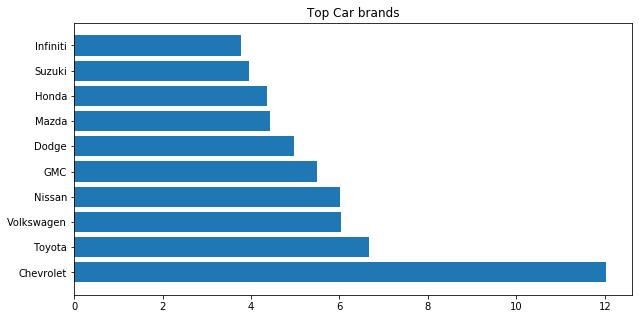

In [24]:
counts = cars['Make'].value_counts()*100/sum(cars['Make'].value_counts())

popular = counts.index[:10]
    
plt.figure(figsize=(10,5))
plt.barh(popular, width=counts[:10])
plt.title('Top Car brands')
plt.show()

In [25]:
prices = cars[['Make','Price']].loc[(cars['Make'] == 'Chevrolet')|
               (cars['Make'] == 'Ford')|
               (cars['Make'] == 'Volkswagen')|
               (cars['Make'] == 'Toyota')|
               (cars['Make'] == 'Dodge')|
               (cars['Make'] == 'Nissan')|
               (cars['Make'] == 'GMC')|
               (cars['Make'] == 'Honda')|
               (cars['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# Plotting correlation matrix

In [26]:
print(cars.corr())

                     Year        HP  Cylinders  Number of Doors     MPG-H  \
Year             1.000000  0.325184  -0.106680         0.240495  0.373376   
HP               0.325184  1.000000   0.734026         0.041088 -0.453371   
Cylinders       -0.106680  0.734026   1.000000         0.020398 -0.691404   
Number of Doors  0.240495  0.041088   0.020398         1.000000  0.008897   
MPG-H            0.373376 -0.453371  -0.691404         0.008897  1.000000   
MPG-C            0.335334 -0.554664  -0.746367         0.025387  0.936981   
Popularity       0.200925  0.095246   0.013311        -0.076300  0.093082   
Price            0.591630  0.745829   0.388860         0.130451 -0.121085   

                    MPG-C  Popularity     Price  
Year             0.335334    0.200925  0.591630  
HP              -0.554664    0.095246  0.745829  
Cylinders       -0.746367    0.013311  0.388860  
Number of Doors  0.025387   -0.076300  0.130451  
MPG-H            0.936981    0.093082 -0.121085  
MPG-C 

## Insights:-
##### Highest correlation is between MPG-H & MPG-C and Cylinders and HP
##### Highest anti correlation is between Cylinders and MPG-C

# Plotting graphs to perform EDA

#### Histogram

Histogram refers to the frequency of occurrence of variables in an interval.

Text(0.5, 0, 'Make')

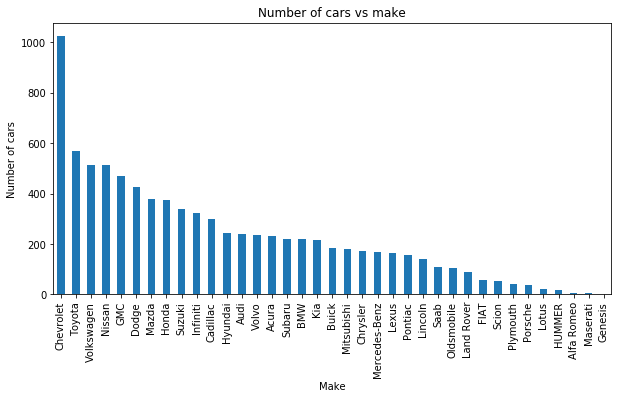

In [34]:
cars.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars vs make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

#### Heat map

 Heat Maps is a type of plot which is necessary when we need to find the dependent variables. In the below heat map it is known that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325184,-0.106680,0.240495,0.373376,0.335334,0.200925,0.591630
HP,0.325184,1.000000,0.734026,0.041088,-0.453371,-0.554664,0.095246,0.745829
Cylinders,-0.106680,0.734026,1.000000,0.020398,-0.691404,-0.746367,0.013311,0.388860
Number of Doors,0.240495,0.041088,0.020398,1.000000,0.008897,0.025387,-0.076300,0.130451
MPG-H,0.373376,-0.453371,-0.691404,0.008897,1.000000,0.936981,0.093082,-0.121085
MPG-C,0.335334,-0.554664,-0.746367,0.025387,0.936981,1.000000,0.081209,-0.197101
Popularity,0.200925,0.095246,0.013311,-0.076300,0.093082,0.081209,1.000000,0.113827
Price,0.591630,0.745829,0.388860,0.130451,-0.121085,-0.197101,0.113827,1.000000


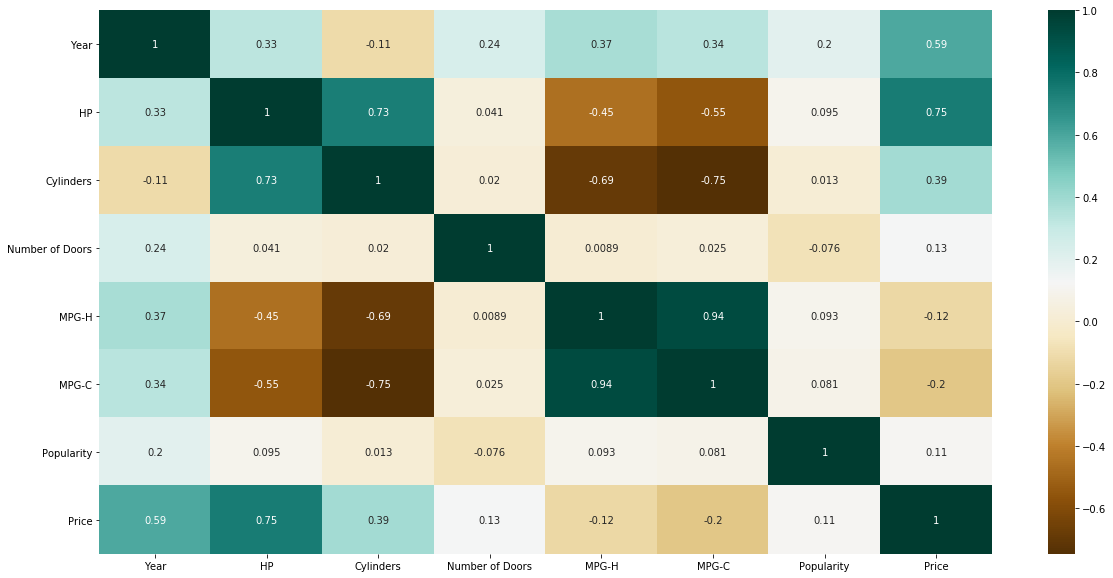

In [31]:
plt.figure(figsize=(20,10))
heat= cars.corr()
sns.heatmap(heat,cmap="BrBG",annot=True)
heat

#### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below.

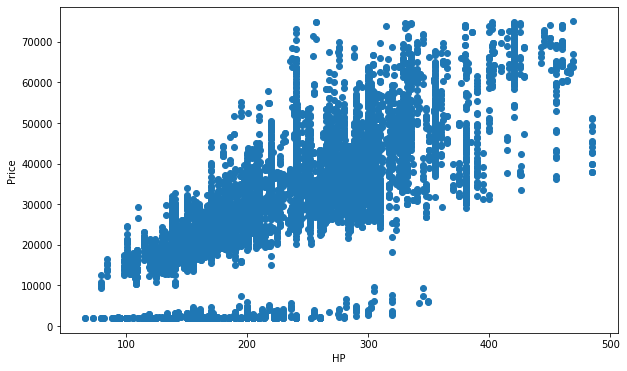

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cars['HP'], cars['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()